## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  65.328649  1643.684952  0.009888  3.053169  0.323760
1  47.398975   759.031982  0.101326  3.707718  1.041643
2  96.429476  1687.617018  0.703663  3.679900  1.568504
3  29.976756  1663.511596  0.814563  5.045931  1.536589
4  99.722146   499.437535  0.347332  2.103126  1.041155


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.47152 | train_mse: 7.12371 | train_mae: 2.03942 |  0:00:00s
epoch 1  | loss: 0.94101 | train_mse: 7.17081 | train_mae: 2.12834 |  0:00:00s
epoch 2  | loss: 0.40071 | train_mse: 7.63174 | train_mae: 2.24304 |  0:00:00s


epoch 3  | loss: 0.38448 | train_mse: 4.88851 | train_mae: 1.82022 |  0:00:00s
epoch 4  | loss: 0.30482 | train_mse: 3.59103 | train_mae: 1.51943 |  0:00:00s
epoch 5  | loss: 0.30789 | train_mse: 4.21865 | train_mae: 1.5584  |  0:00:00s


epoch 6  | loss: 0.25155 | train_mse: 3.97399 | train_mae: 1.47239 |  0:00:00s
epoch 7  | loss: 0.28167 | train_mse: 2.85392 | train_mae: 1.27651 |  0:00:00s
epoch 8  | loss: 0.37458 | train_mse: 3.41172 | train_mae: 1.39552 |  0:00:00s


epoch 9  | loss: 0.2922  | train_mse: 2.46868 | train_mae: 1.17092 |  0:00:01s
epoch 10 | loss: 0.29627 | train_mse: 2.42606 | train_mae: 1.11932 |  0:00:01s
epoch 11 | loss: 0.22825 | train_mse: 2.58348 | train_mae: 1.12121 |  0:00:01s


epoch 12 | loss: 0.30263 | train_mse: 2.23807 | train_mae: 1.05274 |  0:00:01s
epoch 13 | loss: 0.29476 | train_mse: 2.76997 | train_mae: 1.05475 |  0:00:01s
epoch 14 | loss: 0.27377 | train_mse: 1.39287 | train_mae: 0.77742 |  0:00:01s


epoch 15 | loss: 0.21685 | train_mse: 0.3113  | train_mae: 0.44767 |  0:00:01s
epoch 16 | loss: 0.39157 | train_mse: 0.34076 | train_mae: 0.43937 |  0:00:01s
epoch 17 | loss: 0.36519 | train_mse: 0.37835 | train_mae: 0.47153 |  0:00:01s


epoch 18 | loss: 0.3111  | train_mse: 1.44316 | train_mae: 0.77932 |  0:00:01s
epoch 19 | loss: 0.25412 | train_mse: 1.24285 | train_mae: 0.72169 |  0:00:01s
epoch 20 | loss: 0.20399 | train_mse: 0.71173 | train_mae: 0.56349 |  0:00:01s


epoch 21 | loss: 0.19952 | train_mse: 0.25786 | train_mae: 0.40114 |  0:00:02s
epoch 22 | loss: 0.20825 | train_mse: 0.19403 | train_mae: 0.34858 |  0:00:02s


epoch 23 | loss: 0.27269 | train_mse: 0.16455 | train_mae: 0.32051 |  0:00:02s
epoch 24 | loss: 0.22903 | train_mse: 0.18549 | train_mae: 0.32262 |  0:00:02s


epoch 25 | loss: 0.16033 | train_mse: 0.24027 | train_mae: 0.36025 |  0:00:02s
epoch 26 | loss: 0.34861 | train_mse: 0.23156 | train_mae: 0.36603 |  0:00:02s
epoch 27 | loss: 0.55256 | train_mse: 0.1785  | train_mae: 0.32907 |  0:00:02s


epoch 28 | loss: 0.27548 | train_mse: 0.14589 | train_mae: 0.30829 |  0:00:02s
epoch 29 | loss: 0.17495 | train_mse: 0.1454  | train_mae: 0.31226 |  0:00:02s
epoch 30 | loss: 0.36593 | train_mse: 0.19761 | train_mae: 0.34878 |  0:00:02s


epoch 31 | loss: 0.17353 | train_mse: 0.14503 | train_mae: 0.30145 |  0:00:03s
epoch 32 | loss: 0.21084 | train_mse: 0.14103 | train_mae: 0.29286 |  0:00:03s


epoch 33 | loss: 0.1895  | train_mse: 0.13951 | train_mae: 0.29329 |  0:00:03s
epoch 34 | loss: 0.23529 | train_mse: 0.12089 | train_mae: 0.26732 |  0:00:03s
epoch 35 | loss: 0.14448 | train_mse: 0.15147 | train_mae: 0.29432 |  0:00:03s


epoch 36 | loss: 0.13651 | train_mse: 0.26483 | train_mae: 0.36335 |  0:00:03s
epoch 37 | loss: 0.2632  | train_mse: 0.38148 | train_mae: 0.4263  |  0:00:03s
epoch 38 | loss: 0.11526 | train_mse: 0.19646 | train_mae: 0.34058 |  0:00:03s


epoch 39 | loss: 0.226   | train_mse: 0.15737 | train_mae: 0.31079 |  0:00:03s
epoch 40 | loss: 0.30708 | train_mse: 0.31185 | train_mae: 0.3951  |  0:00:03s
epoch 41 | loss: 0.14015 | train_mse: 0.28856 | train_mae: 0.3848  |  0:00:03s


epoch 42 | loss: 0.13608 | train_mse: 0.16429 | train_mae: 0.30792 |  0:00:04s
epoch 43 | loss: 0.1073  | train_mse: 0.10567 | train_mae: 0.25239 |  0:00:04s
epoch 44 | loss: 0.19888 | train_mse: 0.11225 | train_mae: 0.26621 |  0:00:04s


epoch 45 | loss: 0.11488 | train_mse: 0.13361 | train_mae: 0.2785  |  0:00:04s
epoch 46 | loss: 0.25489 | train_mse: 0.13928 | train_mae: 0.28589 |  0:00:04s
epoch 47 | loss: 0.2964  | train_mse: 0.1372  | train_mae: 0.28672 |  0:00:04s


epoch 48 | loss: 0.18953 | train_mse: 0.12301 | train_mae: 0.27149 |  0:00:04s
epoch 49 | loss: 0.1331  | train_mse: 0.12161 | train_mae: 0.26382 |  0:00:04s
epoch 50 | loss: 0.10499 | train_mse: 0.09317 | train_mae: 0.24479 |  0:00:04s


epoch 51 | loss: 0.33321 | train_mse: 0.09247 | train_mae: 0.24616 |  0:00:04s
epoch 52 | loss: 0.1196  | train_mse: 0.0862  | train_mae: 0.23236 |  0:00:04s
epoch 53 | loss: 0.22182 | train_mse: 0.09465 | train_mae: 0.24671 |  0:00:05s


epoch 54 | loss: 0.12674 | train_mse: 0.08725 | train_mae: 0.23903 |  0:00:05s
epoch 55 | loss: 0.28394 | train_mse: 0.09473 | train_mae: 0.24733 |  0:00:05s
epoch 56 | loss: 0.19925 | train_mse: 0.10289 | train_mae: 0.25552 |  0:00:05s


epoch 57 | loss: 0.15446 | train_mse: 0.08791 | train_mae: 0.23355 |  0:00:05s
epoch 58 | loss: 0.12697 | train_mse: 0.07932 | train_mae: 0.21645 |  0:00:05s


epoch 59 | loss: 0.11876 | train_mse: 0.07911 | train_mae: 0.22166 |  0:00:05s
epoch 60 | loss: 0.16776 | train_mse: 0.09634 | train_mae: 0.24152 |  0:00:05s
epoch 61 | loss: 0.12152 | train_mse: 0.1085  | train_mae: 0.24754 |  0:00:05s


epoch 62 | loss: 0.21188 | train_mse: 0.14199 | train_mae: 0.27363 |  0:00:05s
epoch 63 | loss: 0.16345 | train_mse: 0.19665 | train_mae: 0.30102 |  0:00:05s
epoch 64 | loss: 0.12    | train_mse: 0.25514 | train_mae: 0.31289 |  0:00:06s


epoch 65 | loss: 0.13227 | train_mse: 0.20263 | train_mae: 0.29546 |  0:00:06s
epoch 66 | loss: 0.10299 | train_mse: 0.14798 | train_mae: 0.28171 |  0:00:06s
epoch 67 | loss: 0.16889 | train_mse: 0.11465 | train_mae: 0.26582 |  0:00:06s


epoch 68 | loss: 0.09237 | train_mse: 0.11831 | train_mae: 0.26713 |  0:00:06s
epoch 69 | loss: 0.11306 | train_mse: 0.15088 | train_mae: 0.28391 |  0:00:06s
epoch 70 | loss: 0.39414 | train_mse: 0.16435 | train_mae: 0.28446 |  0:00:06s


epoch 71 | loss: 0.15579 | train_mse: 0.16926 | train_mae: 0.27997 |  0:00:06s
epoch 72 | loss: 0.13986 | train_mse: 0.20219 | train_mae: 0.29281 |  0:00:06s
epoch 73 | loss: 0.15706 | train_mse: 0.15558 | train_mae: 0.26984 |  0:00:06s


epoch 74 | loss: 0.11603 | train_mse: 0.12975 | train_mae: 0.25572 |  0:00:06s
epoch 75 | loss: 0.12604 | train_mse: 0.11704 | train_mae: 0.23943 |  0:00:06s
epoch 76 | loss: 0.15563 | train_mse: 0.13252 | train_mae: 0.24514 |  0:00:07s


epoch 77 | loss: 0.15325 | train_mse: 0.19591 | train_mae: 0.28997 |  0:00:07s
epoch 78 | loss: 0.27592 | train_mse: 0.30548 | train_mae: 0.33985 |  0:00:07s
epoch 79 | loss: 0.09306 | train_mse: 0.27308 | train_mae: 0.33308 |  0:00:07s


epoch 80 | loss: 0.36474 | train_mse: 0.23169 | train_mae: 0.33505 |  0:00:07s
epoch 81 | loss: 0.08514 | train_mse: 0.16214 | train_mae: 0.299   |  0:00:07s


epoch 82 | loss: 0.26727 | train_mse: 0.14727 | train_mae: 0.29242 |  0:00:07s
epoch 83 | loss: 0.1291  | train_mse: 0.12309 | train_mae: 0.26647 |  0:00:07s
epoch 84 | loss: 0.12812 | train_mse: 0.12544 | train_mae: 0.26726 |  0:00:07s


epoch 85 | loss: 0.12795 | train_mse: 0.09439 | train_mae: 0.24289 |  0:00:07s
epoch 86 | loss: 0.24292 | train_mse: 0.07611 | train_mae: 0.22495 |  0:00:07s
epoch 87 | loss: 0.39028 | train_mse: 0.07296 | train_mae: 0.21797 |  0:00:08s


epoch 88 | loss: 0.10194 | train_mse: 0.07962 | train_mae: 0.22761 |  0:00:08s
epoch 89 | loss: 0.16243 | train_mse: 0.20261 | train_mae: 0.29373 |  0:00:08s
epoch 90 | loss: 0.15882 | train_mse: 0.25692 | train_mae: 0.29979 |  0:00:08s


epoch 91 | loss: 0.13159 | train_mse: 0.20262 | train_mae: 0.2794  |  0:00:08s
epoch 92 | loss: 0.15908 | train_mse: 0.13916 | train_mae: 0.25481 |  0:00:08s
epoch 93 | loss: 0.08692 | train_mse: 0.10104 | train_mae: 0.23013 |  0:00:08s


epoch 94 | loss: 0.112   | train_mse: 0.05989 | train_mae: 0.19281 |  0:00:08s
epoch 95 | loss: 0.07754 | train_mse: 0.05998 | train_mae: 0.18859 |  0:00:08s
epoch 96 | loss: 0.14555 | train_mse: 0.08026 | train_mae: 0.21284 |  0:00:08s


epoch 97 | loss: 0.11543 | train_mse: 0.08906 | train_mae: 0.22198 |  0:00:09s
epoch 98 | loss: 0.12123 | train_mse: 0.0597  | train_mae: 0.19136 |  0:00:09s
epoch 99 | loss: 0.07713 | train_mse: 0.07965 | train_mae: 0.2162  |  0:00:09s


epoch 100| loss: 0.15843 | train_mse: 0.14952 | train_mae: 0.26096 |  0:00:09s
epoch 101| loss: 0.07657 | train_mse: 0.20534 | train_mae: 0.27704 |  0:00:09s
epoch 102| loss: 0.1695  | train_mse: 0.22383 | train_mae: 0.28175 |  0:00:09s


epoch 103| loss: 0.0903  | train_mse: 0.20397 | train_mae: 0.27493 |  0:00:09s
epoch 104| loss: 0.15975 | train_mse: 0.16434 | train_mae: 0.25801 |  0:00:09s
epoch 105| loss: 0.1785  | train_mse: 0.12396 | train_mae: 0.23882 |  0:00:09s


epoch 106| loss: 0.09294 | train_mse: 0.10668 | train_mae: 0.22868 |  0:00:09s
epoch 107| loss: 0.1426  | train_mse: 0.10657 | train_mae: 0.22623 |  0:00:09s
epoch 108| loss: 0.1208  | train_mse: 0.09149 | train_mae: 0.21658 |  0:00:10s


epoch 109| loss: 0.36451 | train_mse: 0.11186 | train_mae: 0.23147 |  0:00:10s
epoch 110| loss: 0.07416 | train_mse: 0.11813 | train_mae: 0.23165 |  0:00:10s
epoch 111| loss: 0.14717 | train_mse: 0.1062  | train_mae: 0.22382 |  0:00:10s


epoch 112| loss: 0.08931 | train_mse: 0.09449 | train_mae: 0.20752 |  0:00:10s
epoch 113| loss: 0.10332 | train_mse: 0.09416 | train_mae: 0.21222 |  0:00:10s
epoch 114| loss: 0.14573 | train_mse: 0.1094  | train_mae: 0.22796 |  0:00:10s


epoch 115| loss: 0.06583 | train_mse: 0.14422 | train_mae: 0.25151 |  0:00:10s
epoch 116| loss: 0.0902  | train_mse: 0.08725 | train_mae: 0.21243 |  0:00:10s
epoch 117| loss: 0.07103 | train_mse: 0.05639 | train_mae: 0.18194 |  0:00:10s


epoch 118| loss: 0.15728 | train_mse: 0.07097 | train_mae: 0.1921  |  0:00:10s
epoch 119| loss: 0.08381 | train_mse: 0.06078 | train_mae: 0.17664 |  0:00:10s
epoch 120| loss: 0.1634  | train_mse: 0.0622  | train_mae: 0.18335 |  0:00:11s


epoch 121| loss: 0.09404 | train_mse: 0.05805 | train_mae: 0.18284 |  0:00:11s
epoch 122| loss: 0.13848 | train_mse: 0.08103 | train_mae: 0.22575 |  0:00:11s
epoch 123| loss: 0.10087 | train_mse: 0.09715 | train_mae: 0.22789 |  0:00:11s


epoch 124| loss: 0.14136 | train_mse: 0.09166 | train_mae: 0.21246 |  0:00:11s
epoch 125| loss: 0.15602 | train_mse: 0.11652 | train_mae: 0.22452 |  0:00:11s


epoch 126| loss: 0.07657 | train_mse: 0.18638 | train_mae: 0.26256 |  0:00:11s
epoch 127| loss: 0.1696  | train_mse: 0.28354 | train_mae: 0.3026  |  0:00:11s
epoch 128| loss: 0.16268 | train_mse: 0.28252 | train_mae: 0.2948  |  0:00:11s


epoch 129| loss: 0.09524 | train_mse: 0.15037 | train_mae: 0.23403 |  0:00:11s
epoch 130| loss: 0.08721 | train_mse: 0.08661 | train_mae: 0.20226 |  0:00:11s
epoch 131| loss: 0.08287 | train_mse: 0.04457 | train_mae: 0.15712 |  0:00:11s


epoch 132| loss: 0.11722 | train_mse: 0.077   | train_mae: 0.19654 |  0:00:12s
epoch 133| loss: 0.11042 | train_mse: 0.09404 | train_mae: 0.21092 |  0:00:12s
epoch 134| loss: 0.11393 | train_mse: 0.07888 | train_mae: 0.19736 |  0:00:12s


epoch 135| loss: 0.11537 | train_mse: 0.04647 | train_mae: 0.159   |  0:00:12s
epoch 136| loss: 0.07231 | train_mse: 0.05641 | train_mae: 0.17361 |  0:00:12s
epoch 137| loss: 0.10897 | train_mse: 0.07225 | train_mae: 0.18641 |  0:00:12s


epoch 138| loss: 0.11466 | train_mse: 0.07891 | train_mae: 0.19151 |  0:00:12s
epoch 139| loss: 0.10582 | train_mse: 0.08341 | train_mae: 0.1986  |  0:00:12s
epoch 140| loss: 0.1058  | train_mse: 0.09858 | train_mae: 0.2133  |  0:00:12s


epoch 141| loss: 0.11654 | train_mse: 0.122   | train_mae: 0.24396 |  0:00:12s
epoch 142| loss: 0.11216 | train_mse: 0.13971 | train_mae: 0.25063 |  0:00:12s
epoch 143| loss: 0.16015 | train_mse: 0.16741 | train_mae: 0.25893 |  0:00:12s


epoch 144| loss: 0.08458 | train_mse: 0.18318 | train_mae: 0.27072 |  0:00:13s
epoch 145| loss: 0.17053 | train_mse: 0.22963 | train_mae: 0.29973 |  0:00:13s
epoch 146| loss: 0.1484  | train_mse: 0.23661 | train_mae: 0.28464 |  0:00:13s


epoch 147| loss: 0.25156 | train_mse: 0.11432 | train_mae: 0.22734 |  0:00:13s
epoch 148| loss: 0.17034 | train_mse: 0.06586 | train_mae: 0.19917 |  0:00:13s
epoch 149| loss: 0.11849 | train_mse: 0.06214 | train_mae: 0.19123 |  0:00:13s


epoch 150| loss: 0.10404 | train_mse: 0.04997 | train_mae: 0.16788 |  0:00:13s
epoch 151| loss: 0.06532 | train_mse: 0.04353 | train_mae: 0.15944 |  0:00:13s
epoch 152| loss: 0.15143 | train_mse: 0.04196 | train_mae: 0.15882 |  0:00:13s


epoch 153| loss: 0.16516 | train_mse: 0.05488 | train_mae: 0.17392 |  0:00:13s
epoch 154| loss: 0.12131 | train_mse: 0.0802  | train_mae: 0.20058 |  0:00:13s
epoch 155| loss: 0.10069 | train_mse: 0.11093 | train_mae: 0.22228 |  0:00:13s


epoch 156| loss: 0.12338 | train_mse: 0.07988 | train_mae: 0.19949 |  0:00:14s
epoch 157| loss: 0.07516 | train_mse: 0.04831 | train_mae: 0.16387 |  0:00:14s
epoch 158| loss: 0.06633 | train_mse: 0.05876 | train_mae: 0.18529 |  0:00:14s


epoch 159| loss: 0.1081  | train_mse: 0.07662 | train_mae: 0.20334 |  0:00:14s
epoch 160| loss: 0.11207 | train_mse: 0.08865 | train_mae: 0.21592 |  0:00:14s
epoch 161| loss: 0.08406 | train_mse: 0.06407 | train_mae: 0.18507 |  0:00:14s


epoch 162| loss: 0.10048 | train_mse: 0.05069 | train_mae: 0.16854 |  0:00:14s
epoch 163| loss: 0.1628  | train_mse: 0.06431 | train_mae: 0.18579 |  0:00:14s
epoch 164| loss: 0.09986 | train_mse: 0.05812 | train_mae: 0.1826  |  0:00:14s


epoch 165| loss: 0.14837 | train_mse: 0.05319 | train_mae: 0.17274 |  0:00:14s
epoch 166| loss: 0.14307 | train_mse: 0.04853 | train_mae: 0.16512 |  0:00:14s
epoch 167| loss: 0.1114  | train_mse: 0.06447 | train_mae: 0.19056 |  0:00:14s


epoch 168| loss: 0.11761 | train_mse: 0.08896 | train_mae: 0.21703 |  0:00:15s
epoch 169| loss: 0.08562 | train_mse: 0.11845 | train_mae: 0.22792 |  0:00:15s
epoch 170| loss: 0.21593 | train_mse: 0.13712 | train_mae: 0.2441  |  0:00:15s


epoch 171| loss: 0.15017 | train_mse: 0.14513 | train_mae: 0.2412  |  0:00:15s
epoch 172| loss: 0.09175 | train_mse: 0.17751 | train_mae: 0.25354 |  0:00:15s


epoch 173| loss: 0.15815 | train_mse: 0.23434 | train_mae: 0.28289 |  0:00:15s
epoch 174| loss: 0.13955 | train_mse: 0.25654 | train_mae: 0.29577 |  0:00:15s
epoch 175| loss: 0.12128 | train_mse: 0.24713 | train_mae: 0.28211 |  0:00:15s


epoch 176| loss: 0.12873 | train_mse: 0.23002 | train_mae: 0.27319 |  0:00:15s
epoch 177| loss: 0.15372 | train_mse: 0.16377 | train_mae: 0.24459 |  0:00:16s
epoch 178| loss: 0.0718  | train_mse: 0.13422 | train_mae: 0.23128 |  0:00:16s


epoch 179| loss: 0.13887 | train_mse: 0.13377 | train_mae: 0.25042 |  0:00:16s
epoch 180| loss: 0.13789 | train_mse: 0.16171 | train_mae: 0.27019 |  0:00:16s
epoch 181| loss: 0.12106 | train_mse: 0.11769 | train_mae: 0.23    |  0:00:16s

Early stopping occurred at epoch 181 with best_epoch = 131 and best_train_mae = 0.15712
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

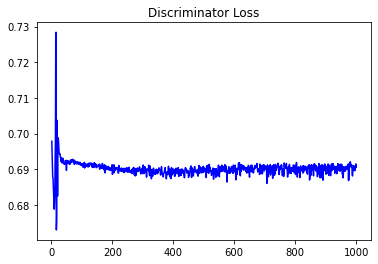

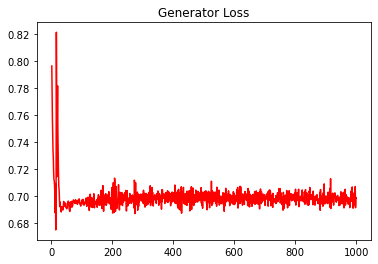

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2808738173159516


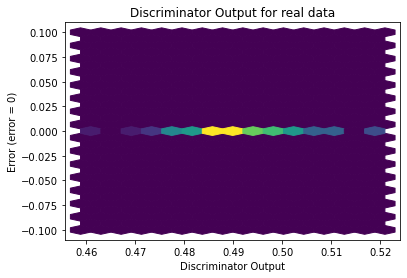

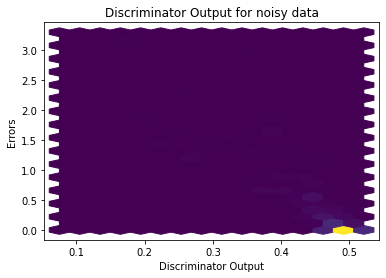

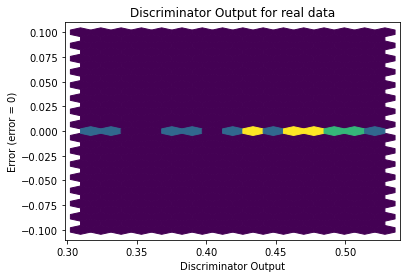

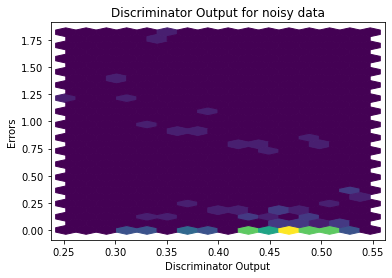

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


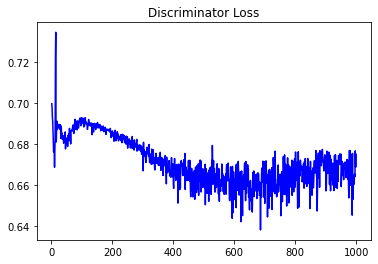

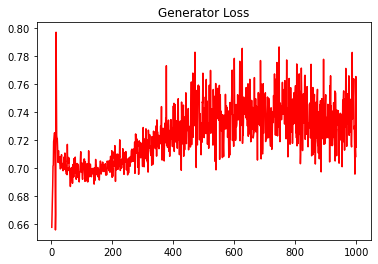

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4756686904287298


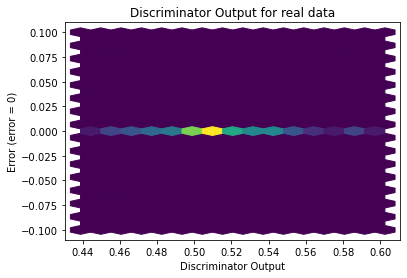

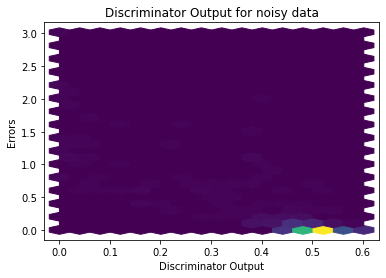

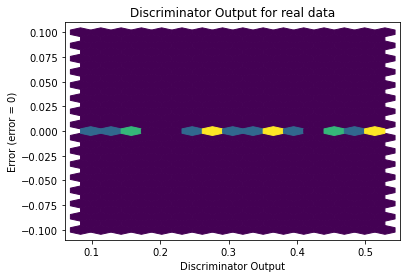

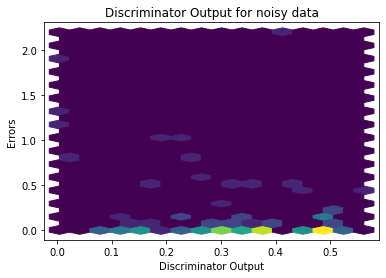

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2813]], requires_grad=True)
